# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [101]:
m=1
p = 0.4
q = 0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [165]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

true

In [166]:
using Quadmath, Printf

res=m;
N=2.0^m*1000.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [167]:
print(N)

1000.0

In [168]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/YangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/YangMills/DATA"

# Grid

In [169]:
using Printf
include("./YangMills.jl");

In [170]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.001
the time step is 0.0005


# Initial data of m β Ψ and Ψ,x

In [171]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initxchi=zeros(L)
initderxchiu=zeros(L)
initderpsi=zeros(L)
initderxchi=zeros(L)


#state array is m beta psi xchi xchi,u psi,r xchi,r r
state_array=[initm initbeta initpsi initxchi initderxchiu initderpsi initderxchi initX];

#PSI,R
A=0.075*p*(1−q)
r0=0.75
sigma=0.25

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#RCHI,R
A=0.25*p*q
r0=0.3
sigma=0.1

initderxchi[4:L-3] = init_derxchi(initX1,r0,sigma,A)

state_array[:,7] = initderxchi

####
#PSI FROM PSI,R, CHI FROM CHI,R
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);
derxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);

funcs=[derpsi_func derxchi_func];

In [172]:
y0=[0.0 0.0 0.0 0.0 0.0]

state_array[4:L-3,1:5] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);

#state_array = ghost(state_array);

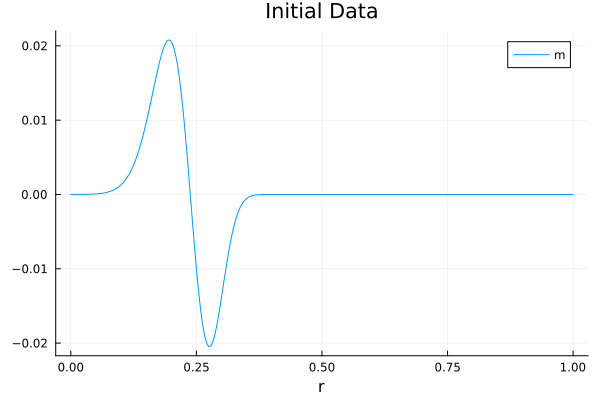

In [173]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,7], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xchi" "xchi,u" "psi,r" "chix,r"])#,ylim=[-0.1,0.1])

In [174]:
state_array[4:L-3,7]

1001-element Vector{Float64}:
  1.234098040866798e-6
  1.3860975316983888e-6
  1.5514890673099037e-6
  1.7312816195648045e-6
  1.926552229746628e-6
  2.1384501581422602e-6
  2.368201259111686e-6
  2.6171125920710977e-6
  2.8865772791699333e-6
  3.178079620798781e-6
  3.4932004804226753e-6
  3.833622950591784e-6
  4.201138312338685e-6
  ⋮
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
  0.0

In [175]:
state_array

1007×8 Matrix{Float64}:
 0.0          0.0           0.0          …  0.0          0.0         -0.003
 0.0          0.0           0.0             0.0          0.0         -0.002
 0.0          0.0           0.0             0.0          0.0         -0.001
 0.0          0.0           0.0             3.33206e-6   1.2341e-6    0.0
 2.13529e-17  1.65354e-11   3.41645e-9      3.49491e-6   1.3861e-6    0.001
 1.24096e-16  7.03198e-11   7.00604e-9   …  3.66371e-6   1.55149e-6   0.002
 4.14415e-16  1.68303e-10   1.07756e-8      3.83865e-6   1.73128e-6   0.003
 1.00761e-15  3.18295e-10   1.4732e-8       4.01994e-6   1.92655e-6   0.004
 2.03489e-15  5.29068e-10   1.88826e-8      4.20779e-6   2.13845e-6   0.005
 3.64532e-15  8.10461e-10   2.32349e-8      4.4024e-6    2.3682e-6    0.006
 6.00767e-15  1.17348e-9    2.77967e-8   …  4.60401e-6   2.61711e-6   0.007
 9.3124e-15   1.63045e-9    3.25759e-8      4.81283e-6   2.88658e-6   0.008
 1.37739e-14  2.19508e-9    3.7581e-8       5.02911e-6   3.17808e-

In [176]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [177]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "xchi", "deruxchi", "derpsi", "derxchi"]

print_muninn(files, 0, state_array[:,:],res,"w")

In [178]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [179]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.40080120158876464


In [180]:
using Base.Threads
Threads.nthreads()

4

In [181]:
if m==1
    global dt=2e-8
elseif m==2
    global dt=1e-6
else
    global dt=1e-6/2
end

2.0e-8

 ## Time evolution

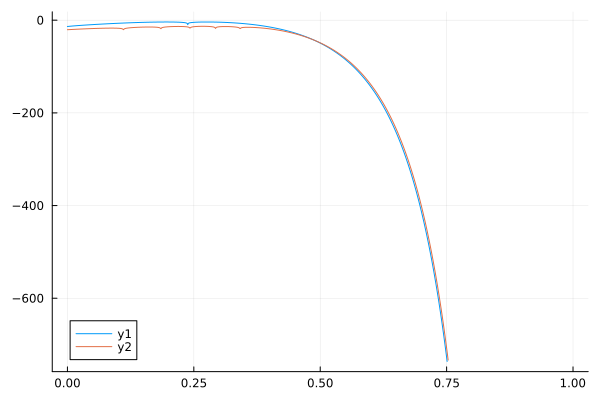

In [182]:
yy=zeros(L)
for i in 4:L-3
    yy[i]=dissipation(state_array,i,0.02)[7]
end
plot(initX1, [log.(abs.(state_array[4:L-3,7])) log.(abs.(yy[4:L-3]))])#,xlim=[0, 0.5],ylim=[-20,1])
plot(initX1, [log.(abs.(state_array[4:L-3,7])) log.(abs.(yy[4:L-3]))])#



fixed grid

In [183]:
finaltime=3.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 50 dt is 0.00020040060079544605, t=0.010020030039733301 speed is 0.4990005000138324, dx/dt=4.990005000138324


iteration 100 dt is 0.00020040060080791556, t=0.020040060079718088 speed is 0.49900049998278323, dx/dt=4.990004999827831


iteration 150 dt is 0.00020040060090835318, t=0.030060090121874723 speed is 0.49900049973269195, dx/dt=4.99000499732692


iteration 200 dt is 0.00020040060166668218, t=0.04008012018066506 speed is 0.49900049784444145, dx/dt=4.990004978444414


iteration 250 dt is 0.00020040060733259127, t=0.05010015036390707 speed is 0.4990004837362434, dx/dt=4.9900048373624335


iteration 300 dt is 0.00020040065071015922, t=0.06012018148806008 speed is 0.49900037572547934, dx/dt=4.990003757254794


iteration 350 dt is 0.00020040104673391102, t=0.07014022053726074 speed is 0.4989993896228408, dx/dt=4.989993896228408


iteration 400 dt is 0.0002004080743631623, t=0.08016037050803394 speed is 0.4989818914121623, dx/dt=4.9898189141216225


iteration 450 dt is 0.00

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [216]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: InterruptException:

In [49]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [50]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

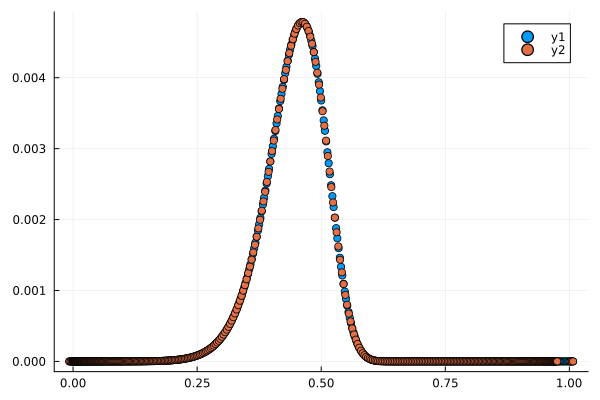

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

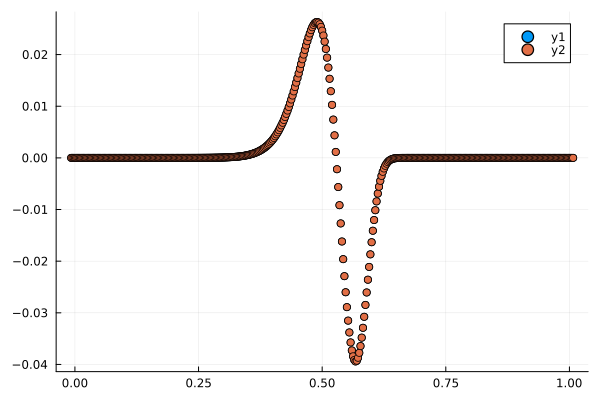

In [417]:
scatter([x1,x1],[y1,y2])